# Classification with Keras for the Fashion MNIST dataset

In [32]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

## Load the data

We use the Fashion MNIST dataset.

In [2]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

In [3]:
X_train_full.shape

(60000, 28, 28)

In [4]:
y_train_full.shape

(60000,)

In [5]:
X_test.shape

(10000, 28, 28)

In [6]:
y_test.shape

(10000,)

## Split the full training data into a validation set and a training set

In [7]:
X_valid, X_train = X_train_full[:5000]/255.0, X_train_full[5000:]/255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

In [8]:
X_valid.shape

(5000, 28, 28)

In [9]:
X_train.shape

(55000, 28, 28)

## Visualize some part of the training data

In [10]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

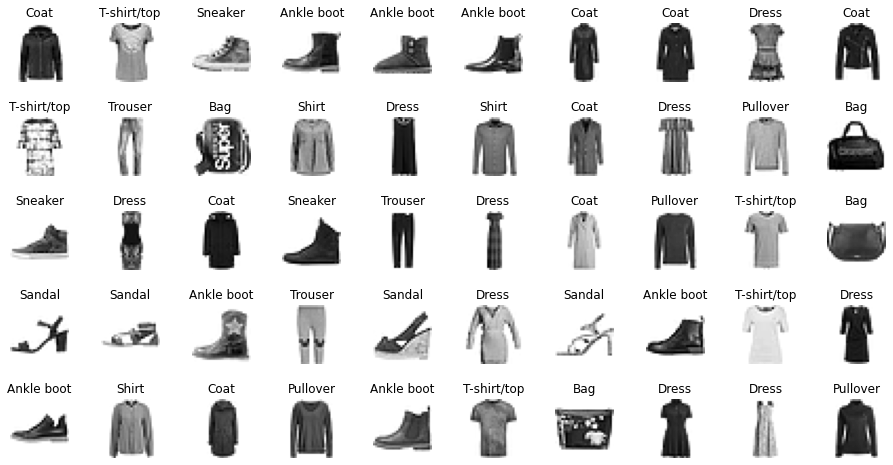

In [11]:
picRows = 5
picCols = 10
fig, axs = plt.subplots(picRows, picCols, figsize=(16, 8))
for row in range(picRows):
    for col in range(picCols):
        currPicIdx = row*picCols + col
        axs[row, col].imshow(255-X_train[currPicIdx], cmap='gray')
        axs[row, col].set_title(class_names[y_train[currPicIdx]])
        axs[row, col].axis('off')
plt.subplots_adjust(hspace = 0.6)
plt.show()

## Create the model

In [12]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation='relu'),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [14]:
model.layers

In [15]:
hidden1 = model.layers[1]
weights, biases = hidden1.get_weights()

In [16]:
weights

array([[ 0.07303466,  0.02749706, -0.04070781, ..., -0.05866691,
         0.01520904,  0.04598058],
       [ 0.00696786,  0.04991317, -0.0705032 , ..., -0.01645798,
        -0.0180897 ,  0.05239773],
       [-0.02574603, -0.06838246, -0.0434764 , ..., -0.01557213,
        -0.03121422, -0.01574965],
       ...,
       [-0.00960663,  0.06400691,  0.02654732, ..., -0.03795915,
         0.06444208, -0.00939551],
       [ 0.06976205, -0.04155454, -0.02510055, ..., -0.01221432,
         0.06500502, -0.0290223 ],
       [ 0.0002509 , -0.00425404,  0.0043448 , ..., -0.03502701,
        -0.05548461, -0.05310024]], dtype=float32)

In [17]:
weights.shape

(784, 300)

In [18]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [19]:
biases.shape

(300,)

## Build the model

In [20]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

## Train and evaluate the model

In [21]:
history = model.fit(X_train, y_train, epochs=50, validation_data=(X_valid, y_valid))

Epoch 1/50
1719/1719 [==============================] - 2s 1ms/step - loss: 1.0037 - accuracy: 0.6767 - val_loss: 0.4964 - val_accuracy: 0.8322
Epoch 2/50
1719/1719 [==============================] - 1s 730us/step - loss: 0.5052 - accuracy: 0.8245 - val_loss: 0.4477 - val_accuracy: 0.8480
Epoch 3/50
1719/1719 [==============================] - 1s 727us/step - loss: 0.4493 - accuracy: 0.8431 - val_loss: 0.4235 - val_accuracy: 0.8548
Epoch 4/50
1719/1719 [==============================] - 1s 720us/step - loss: 0.4171 - accuracy: 0.8530 - val_loss: 0.4347 - val_accuracy: 0.8492
Epoch 5/50
1719/1719 [==============================] - 1s 730us/step - loss: 0.3951 - accuracy: 0.8616 - val_loss: 0.3874 - val_accuracy: 0.8674
Epoch 6/50
1719/1719 [==============================] - 1s 730us/step - loss: 0.3779 - accuracy: 0.8676 - val_loss: 0.3910 - val_accuracy: 0.8662
Epoch 7/50
1719/1719 [==============================] - 1s 726us/step - loss: 0.3650 - accuracy: 0.8695 - val_loss: 0.3743 - v

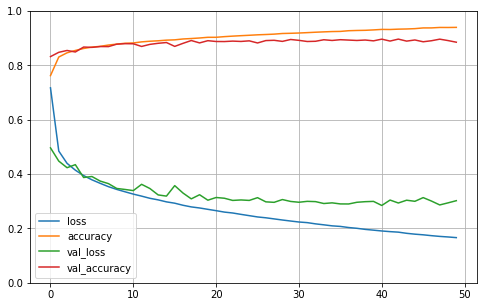

In [22]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [23]:
model.evaluate(X_test/255.0, y_test)

313/313 [==============================] - 0s 473us/step - loss: 0.3378 - accuracy: 0.8835


[0.33777591586112976, 0.8834999799728394]

## Making predictions

We consider some predictions on some randomly chosen instances of the test set (since we lack real new data).

### Prediction probabilities

In [29]:
X_new = X_test[5:10]/255.0
y_proba = model.predict(X_new)
y_proba.round(2)

array([[0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.99, 0.  , 0.01, 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 1.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 1.  , 0.  , 0.  ]],
      dtype=float32)

### Predicted classes

In [30]:
y_pred = model.predict_classes(X_new)
y_pred

array([1, 4, 6, 5, 7], dtype=int64)

In [34]:
np.array(class_names)[y_pred]

array(['Trouser', 'Coat', 'Shirt', 'Sandal', 'Sneaker'], dtype='<U11')

<Figure size 432x288 with 0 Axes>

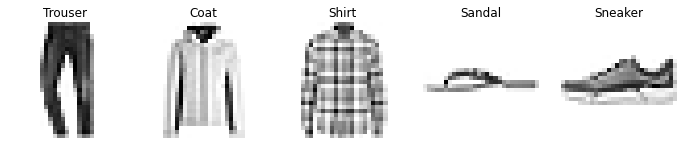

In [47]:
plt.clf()
fig, axs = plt.subplots(1, len(X_new), figsize=(12, 6))
for i in range(len(X_new)):
    axs[i].imshow(255-X_new[i], cmap='gray')
    axs[i].set_title(class_names[y_pred[i]])
    axs[i].axis('off')
plt.subplots_adjust(hspace = 0.6)
plt.show()

### Actual labels

In [48]:
np.array(class_names)[y_test[5:10]]

array(['Trouser', 'Coat', 'Shirt', 'Sandal', 'Sneaker'], dtype='<U11')

In this case, the classifier predicted all test instances correctly!